In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/joaovantol/mining/main/heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df_heart.shape

(303, 14)

In [4]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


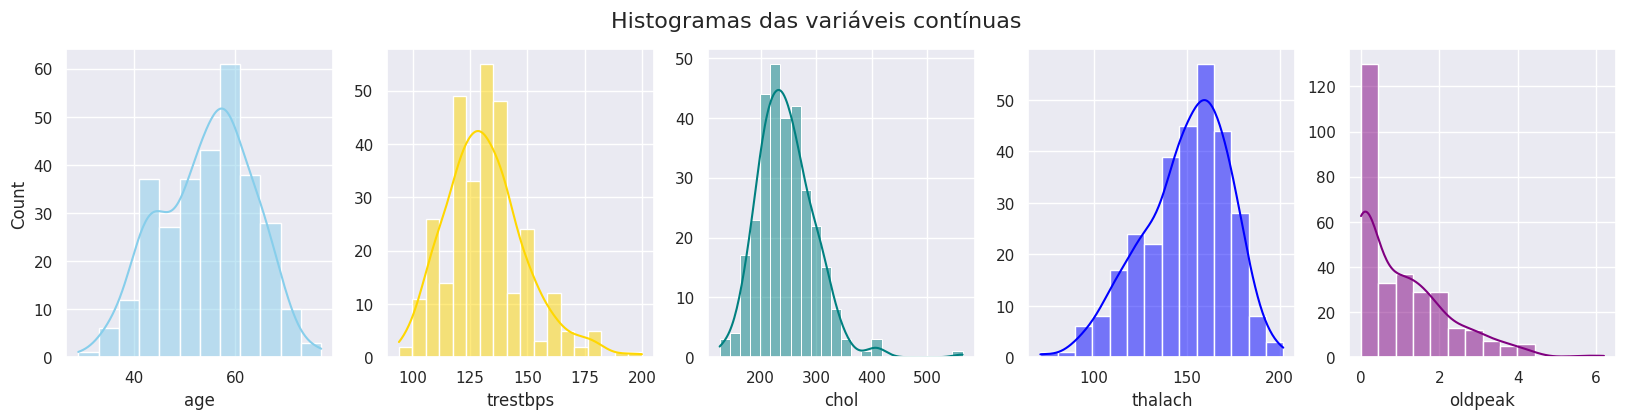

In [6]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

sns.histplot(data=df_heart, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df_heart, x="trestbps", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df_heart, x="chol", kde=True, color="teal", ax=axs[2])
sns.histplot(data=df_heart, x="thalach", kde=True, color="blue", ax=axs[3])
sns.histplot(data=df_heart, x="oldpeak", kde=True, color="purple", ax=axs[4])
axs[1].set(ylabel=None)
axs[2].set(ylabel=None)
axs[3].set(ylabel=None)
axs[4].set(ylabel=None)

fig.suptitle('Histogramas das variáveis contínuas', fontsize=16)

plt.show()

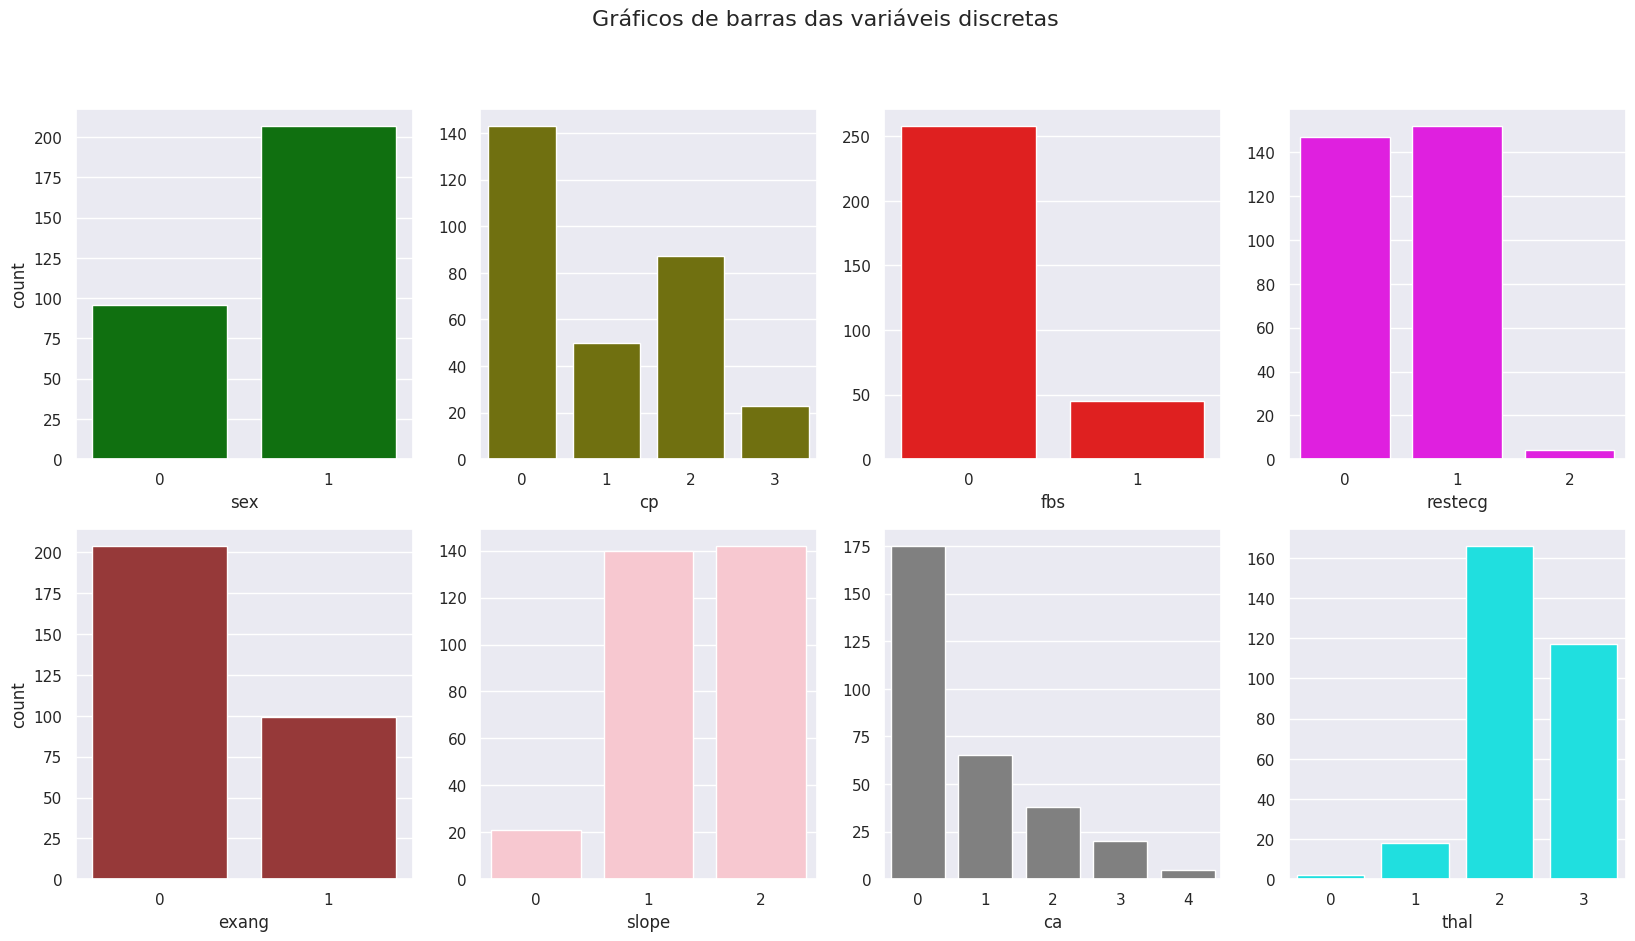

In [7]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.countplot(data=df_heart, x="sex", color="green", ax=axs[0, 0])
sns.countplot(data=df_heart, x="cp", color="olive", ax=axs[0, 1])
sns.countplot(data=df_heart, x="fbs", color="red", ax=axs[0, 2])
sns.countplot(data=df_heart, x="restecg", color="magenta", ax=axs[0, 3])
axs[0, 1].set(ylabel=None)
axs[0, 2].set(ylabel=None)
axs[0, 3].set(ylabel=None)
sns.countplot(data=df_heart, x="exang", color="brown", ax=axs[1, 0])
sns.countplot(data=df_heart, x="slope", color="pink", ax=axs[1, 1])
sns.countplot(data=df_heart, x="ca", color="gray", ax=axs[1, 2])
sns.countplot(data=df_heart, x="thal", color="cyan", ax=axs[1, 3])
axs[1, 1].set(ylabel=None)
axs[1, 2].set(ylabel=None)
axs[1, 3].set(ylabel=None)

fig.suptitle('Gráficos de barras das variáveis discretas', fontsize=16)

plt.show()

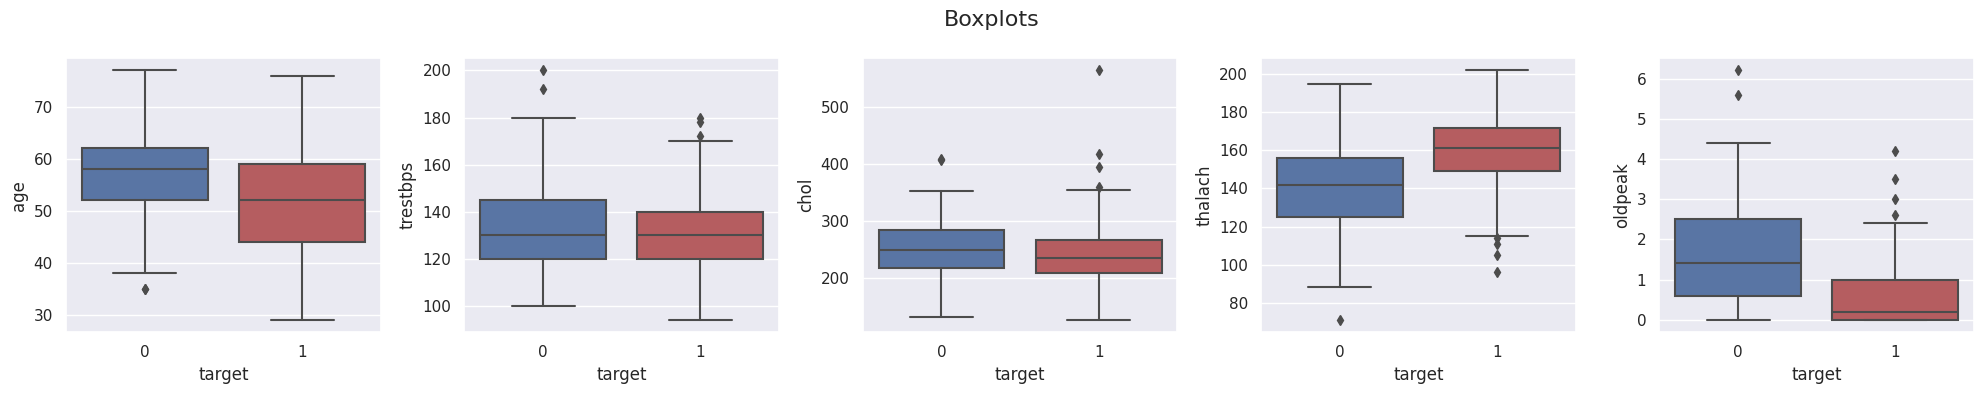

In [8]:
my_pal = {0: "b", 1:"r"}
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

sns.boxplot(x=df_heart["target"], y=df_heart["age"], palette=my_pal, ax=axs[0])
sns.boxplot(x=df_heart["target"], y=df_heart["trestbps"], palette=my_pal, ax=axs[1])
sns.boxplot(x=df_heart["target"], y=df_heart["chol"], palette=my_pal, ax=axs[2])
sns.boxplot(x=df_heart["target"], y=df_heart["thalach"], palette=my_pal, ax=axs[3])
sns.boxplot(x=df_heart["target"], y=df_heart["oldpeak"], palette=my_pal, ax=axs[4])

fig.suptitle('Boxplots', fontsize=16)
fig.tight_layout()

plt.show()

In [ ]:
data_heart = df_heart.to_numpy()
nrow,ncol = data_heart.shape
y = data_heart[:,-1]
X = data_heart[:,0:ncol-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state= 42)

In [ ]:
print("Treinamento: ", X_train.shape)
print("Teste: ", X_test.shape)

Treinamento:  (227, 13)
Teste:  (76, 13)


In [ ]:
colunas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
df_Xtrain = pd.DataFrame(X_train, columns=colunas)
df_Xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,1.0,154.0,232.0,0.0,0.0,164.0,0.0,0.0,2.0,1.0,2.0
1,59.0,1.0,2.0,126.0,218.0,1.0,1.0,134.0,0.0,2.2,1.0,1.0,1.0
2,67.0,1.0,0.0,125.0,254.0,1.0,1.0,163.0,0.0,0.2,1.0,2.0,3.0
3,58.0,1.0,1.0,125.0,220.0,0.0,1.0,144.0,0.0,0.4,1.0,4.0,3.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0


In [ ]:
df_ytrain = pd.DataFrame(y_train, columns = ["target"])
df_ytrain.head()

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [ ]:
train_original = df_Xtrain.join(df_ytrain)
print(train_original.shape)
train_original.head()

(227, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,1.0,154.0,232.0,0.0,0.0,164.0,0.0,0.0,2.0,1.0,2.0,0.0
1,59.0,1.0,2.0,126.0,218.0,1.0,1.0,134.0,0.0,2.2,1.0,1.0,1.0,0.0
2,67.0,1.0,0.0,125.0,254.0,1.0,1.0,163.0,0.0,0.2,1.0,2.0,3.0,0.0
3,58.0,1.0,1.0,125.0,220.0,0.0,1.0,144.0,0.0,0.4,1.0,4.0,3.0,1.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0,1.0


In [ ]:
df_Xtest = pd.DataFrame(X_test, columns=colunas)
df_Xtest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0
1,59.0,1.0,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0
2,57.0,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0
3,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0
4,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0


In [ ]:
df_ytest = pd.DataFrame(y_test, columns = ["target"])
df_ytest.head()

,target
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [ ]:
test_original = df_Xtest.join(df_ytest)
print(test_original.shape)
test_original.head()

(76, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0.0
1,59.0,1.0,3.0,170.0,288.0,0.0,0.0,159.0,0.0,0.2,1.0,0.0,3.0,0.0
2,57.0,1.0,2.0,150.0,126.0,1.0,1.0,173.0,0.0,0.2,2.0,1.0,3.0,1.0
3,56.0,0.0,0.0,134.0,409.0,0.0,0.0,150.0,1.0,1.9,1.0,2.0,3.0,0.0
4,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0,1.0
